In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

C:\Users\wasif\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
import matplotlib.pyplot as plt

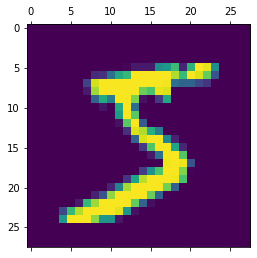

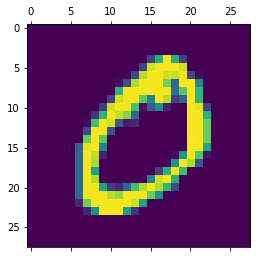

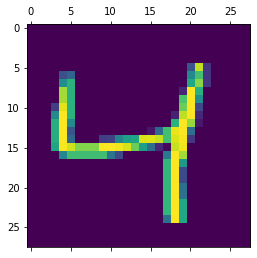

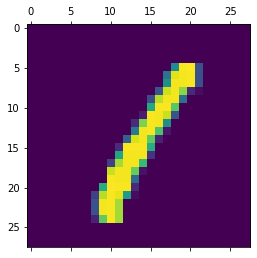

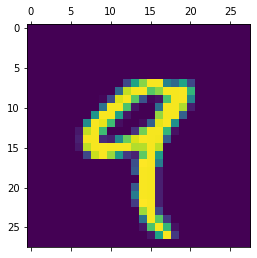

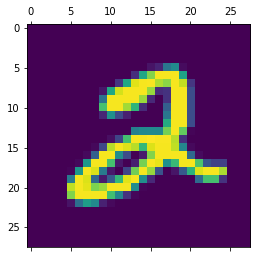

In [8]:
for item in range(0,6):
    plt.matshow(X_train[item])

In [9]:
X_train=tf.keras.utils.normalize(X_train)
X_test=tf.keras.utils.normalize(X_test)

In [10]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [11]:
model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2582 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1051 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0739 - accuracy: 0.9765


In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9731


[0.08696654438972473, 0.9731000065803528]

In [14]:
y_predict=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


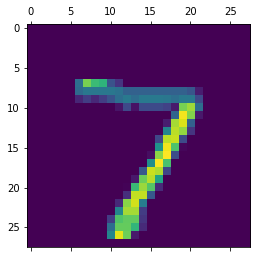

In [21]:
plt.matshow(X_test[0])

In [22]:
y_predict[0]

array([4.0336626e-08, 1.3951138e-06, 1.3920126e-05, 2.2844838e-06,
       1.4902948e-08, 1.3317238e-09, 1.1263080e-11, 9.9998164e-01,
       4.8838235e-08, 6.4200606e-07], dtype=float32)

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    2,    1,    0,    2,    2,    2,    0],
       [   0, 1126,    2,    1,    0,    1,    1,    0,    4,    0],
       [   2,    5, 1001,    6,    0,    1,    3,    7,    7,    0],
       [   0,    0,    3,  987,    0,    1,    0,   10,    6,    3],
       [   1,    2,    1,    0,  952,    0,    7,    4,    6,    9],
       [   3,    0,    0,   16,    2,  859,    4,    1,    4,    3],
       [   6,    3,    0,    1,    4,    6,  933,    0,    5,    0],
       [   0,    9,    5,    1,    1,    0,    0, 1004,    1,    7],
       [   7,    1,    4,    5,    4,    6,    0,    3,  939,    5],
       [   2,    6,    1,    9,   10,    3,    0,   15,    3,  960]])>

Text(69.0, 0.5, 'Actual')

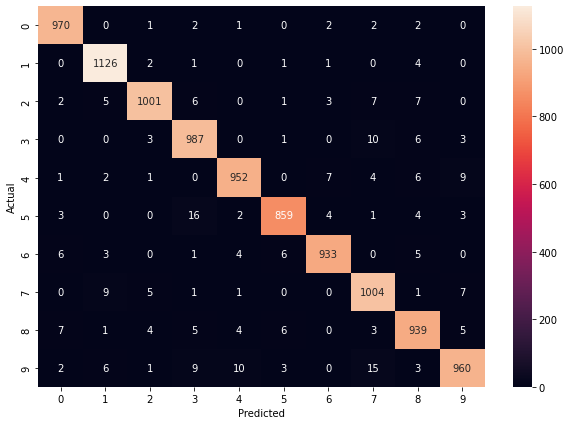

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')